In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int64)

per_clf = Perceptron()
per_clf.fit(X,y)
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

In [2]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.20.0'

In [3]:
keras.__version__

'3.11.3'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype


dtype('uint8')

In [7]:
np.max(X_train_full)

np.uint8(255)

In [8]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], shape=(60000,), dtype=uint8)

In [63]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

C:\Users\LIS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [15]:
hidden = model.layers[1]
hidden

<Dense name=dense, built=True>

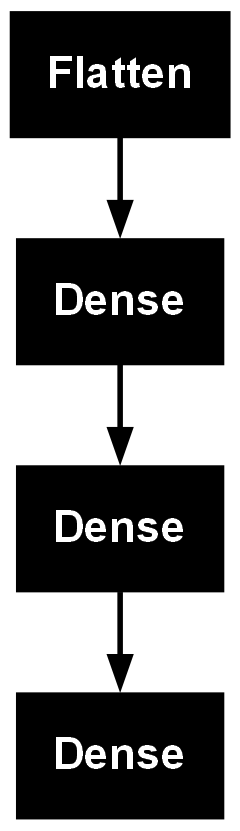

In [16]:
keras.utils.plot_model(model)

In [17]:
pesos, vies = hidden.get_weights()
pesos

array([[ 0.003656  ,  0.0418776 ,  0.07426141, ..., -0.04513526,
        -0.01017749,  0.04271162],
       [ 0.01324499, -0.02782051,  0.05294605, ..., -0.01707261,
         0.02428142, -0.05125012],
       [-0.03089133, -0.04065835, -0.02148696, ...,  0.05921626,
         0.03482787, -0.01164157],
       ...,
       [-0.07040855,  0.06370775,  0.03784398, ..., -0.03667984,
         0.01417847, -0.04890938],
       [ 0.06303877,  0.05587135, -0.0239922 , ...,  0.02774215,
        -0.02641502, -0.03957259],
       [-0.02265777,  0.03187003,  0.05201609, ..., -0.04999911,
         0.05284069, -0.07430953]], shape=(784, 300), dtype=float32)

In [18]:
vies

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [20]:
history = model.fit(X_train, y_train, epochs=33, validation_data=(X_valid,y_valid))

Epoch 1/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7641 - loss: 0.7195 - val_accuracy: 0.8350 - val_loss: 0.4986
Epoch 2/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8326 - loss: 0.4842 - val_accuracy: 0.8522 - val_loss: 0.4444
Epoch 3/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8468 - loss: 0.4402 - val_accuracy: 0.8516 - val_loss: 0.4343
Epoch 4/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8546 - loss: 0.4140 - val_accuracy: 0.8722 - val_loss: 0.3878
Epoch 5/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8612 - loss: 0.3946 - val_accuracy: 0.8580 - val_loss: 0.4099
Epoch 6/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8676 - loss: 0.3788 - val_accuracy: 0.8636 - val_loss: 0.3926
Epoch 7/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8717 - loss: 0.3673 - val_accuracy: 0.8706 - val_loss: 0.3781
Epoch 8/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8754 - loss: 0.3546 -

In [21]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

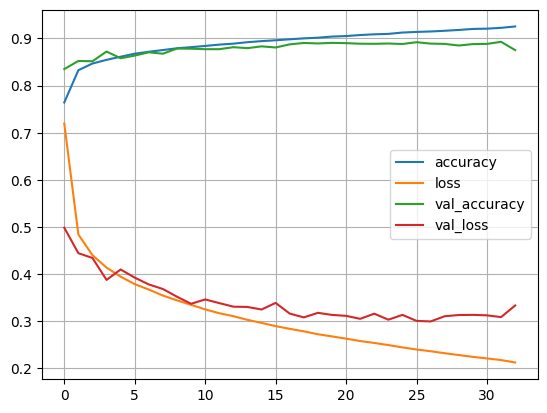

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.show()

In [23]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8426 - loss: 67.2394


[67.23941802978516, 0.8425999879837036]

In [24]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
y_pred = np.argmax(y_prob, axis=1)
y_pred

array([9, 2, 1])

In [64]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

houseing = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(houseing.data, houseing.target)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

C:\Users\LIS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train,y_train, epochs=20, validation_split=0.2)

Epoch 1/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9844 - val_loss: 0.6826
Epoch 2/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9179 - val_loss: 0.8438
Epoch 3/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 4/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - val_loss: nan
Epoch 5/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 12/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 13/20
387/387 ━━━━━

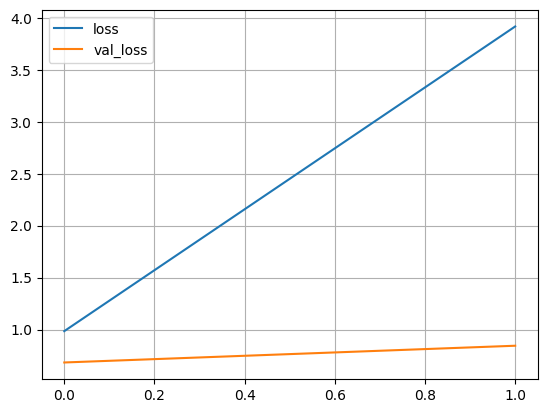

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df =pd.DataFrame(history.history).plot()
plt.grid(True)

In [30]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan


nan

In [31]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate(1)([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [73]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)
model.evaluate(X_test, y_test) 

Epoch 1/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 12/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 13/20
387/387 ━━━━━━━━━━━━━━━━━

nan

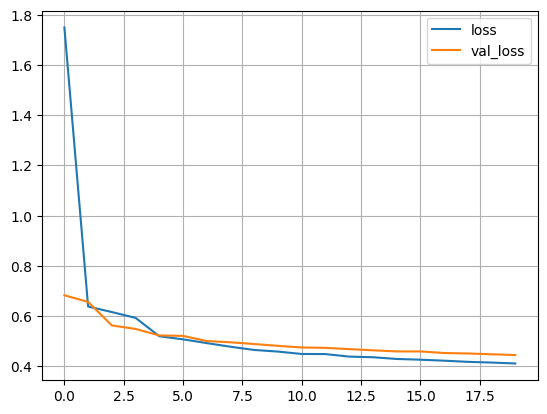

In [33]:
df =pd.DataFrame(history.history).plot()
plt.grid(True)

In [34]:
model.evaluate(X_test,y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4396


0.4396303594112396

In [35]:
X_test[1]

array([ 5.84393529,  1.85678974,  1.06388106, -0.613782  , -0.84771568,
        0.17834794, -0.72923496,  0.61704195])

In [74]:
from tensorflow.keras.layers import Input, Dense

input_A = Input(shape=[5], name="wide_input")
input_B = Input(shape=[6], name="deep_input")
hidden1 = Dense(30, activation="relu")(input_B)
hidden2 = Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [75]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]



In [38]:
history = model.fit((X_train_A, X_train_B), y_train, validation_split=0.2, epochs=150)

Epoch 1/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8216 - val_loss: 0.8877
Epoch 2/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7397 - val_loss: 0.6843
Epoch 3/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6263 - val_loss: 0.6228
Epoch 4/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5796 - val_loss: 0.5873
Epoch 5/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5474 - val_loss: 0.5611
Epoch 6/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5227 - val_loss: 0.5413
Epoch 7/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5029 - val_loss: 0.5263
Epoch 8/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4864 - val_loss: 0.5140
Epoch 9/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4707 - val_loss: 0.5018
Epoch 10/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4579 - val_loss: 0.4907
Epoch 11/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4468 - val_loss: 0.4833
Epoch 12/150
387/387 ━━━━━━━━━━━━━━━━━━━━

In [39]:
model.evaluate((X_test_A, X_test_B), y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3765


0.3764863610267639

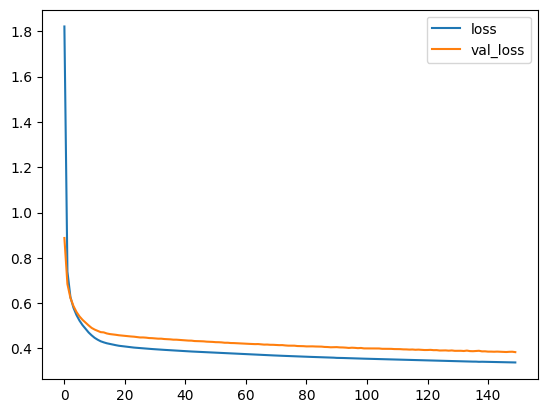

In [40]:
df = pd.DataFrame(history.history).plot()

In [47]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [55]:
model.compile(
    loss=["mse", "mse"],  # uma perda para cada saída
    loss_weights=[0.9, 0.1],
    optimizer=keras.optimizers.SGD(learning_rate=1e-3)
)

history = model.fit(
    (X_train_A, X_train_B),
    (y_train, y_train),   # <-- precisa de duas saídas
    validation_split=0.2,
    epochs=150
)


Epoch 1/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.5661 - mse_loss: 6.1377 - val_loss: 1.3092 - val_mse_loss: 5.4053
Epoch 2/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0558 - mse_loss: 4.3072 - val_loss: 0.9796 - val_mse_loss: 3.7316
Epoch 3/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8578 - mse_loss: 3.0174 - val_loss: 0.8402 - val_mse_loss: 2.7138
Epoch 4/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7535 - mse_loss: 2.2542 - val_loss: 0.7587 - val_mse_loss: 2.1150
Epoch 5/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6928 - mse_loss: 1.8194 - val_loss: 0.7090 - val_mse_loss: 1.7709
Epoch 6/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6537 - mse_loss: 1.5775 - val_loss: 0.6777 - val_mse_loss: 1.5748
Epoch 7/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6270 - mse_loss: 1.4468 - val_loss: 0.6544 - val_mse_loss: 1.4672
Epoch 8/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6082 - mse_loss: 1.3717 - val_loss

In [65]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate(1)([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])
model.compile(loss="mse", optimizer="sgd")

In [66]:
model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7348 - val_loss: 2.4084
Epoch 2/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6463 - val_loss: 2.9699
Epoch 3/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5733 - val_loss: 2.7853
Epoch 4/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6182 - val_loss: 2.2340
Epoch 5/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5401 - val_loss: 1.4850
Epoch 6/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5126 - val_loss: 1.0406
Epoch 7/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4482 - val_loss: 0.7464
Epoch 8/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4301 - val_loss: 0.6238
Epoch 9/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4027 - val_loss: 0.5129
Epoch 10/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4072 - val_loss: 0.5274
Epoch 11/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3855 - val_loss: 0.4511
Epoch 12/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [70]:
model.save("my_first_model.keras")

In [71]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_fisrt_model.keras")

In [76]:
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10


ValueError: Layer "functional_11" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'data:0' shape=(None, 8) dtype=float32>]